In [1]:
import sys
sys.path.insert(0, '../')
import myTA
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

from strategies import Backtesting, MACDZeroHistPrediction, downloadAndMakeAnalysis, SharpeRatio

In [2]:
sharpe_ratio = SharpeRatio()

In [3]:
ticker = 'AAPL'
start = dt.datetime(2023,1,23)
end = dt.datetime.now()
interval = '5m'

strategy = MACDZeroHistPrediction(4, ticker, start, end, interval, fastperiod = 12, slowperiod = 26, signalperiod = 9)
data = downloadAndMakeAnalysis(strategy)
strategy.getBackTestSignals(data)

bt = Backtesting(1000, strategy)
bt.calculateProfit()

print(f"sharpe ratio: {sharpe_ratio.calculate(bt.resturnsdfDaily['ROI_change'])}")

sharpe ratio: 2.42


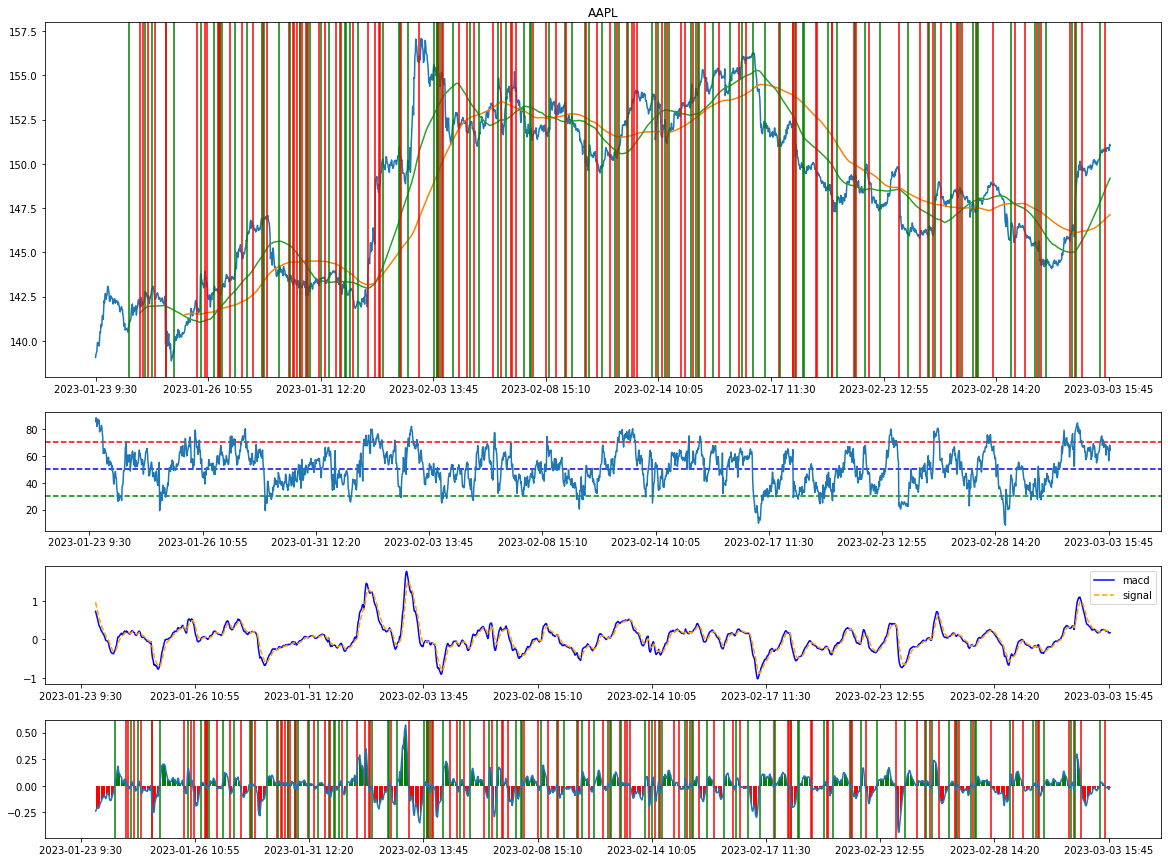

In [4]:
myTA.plotAnalysis(data, ticker, strategy.trades)

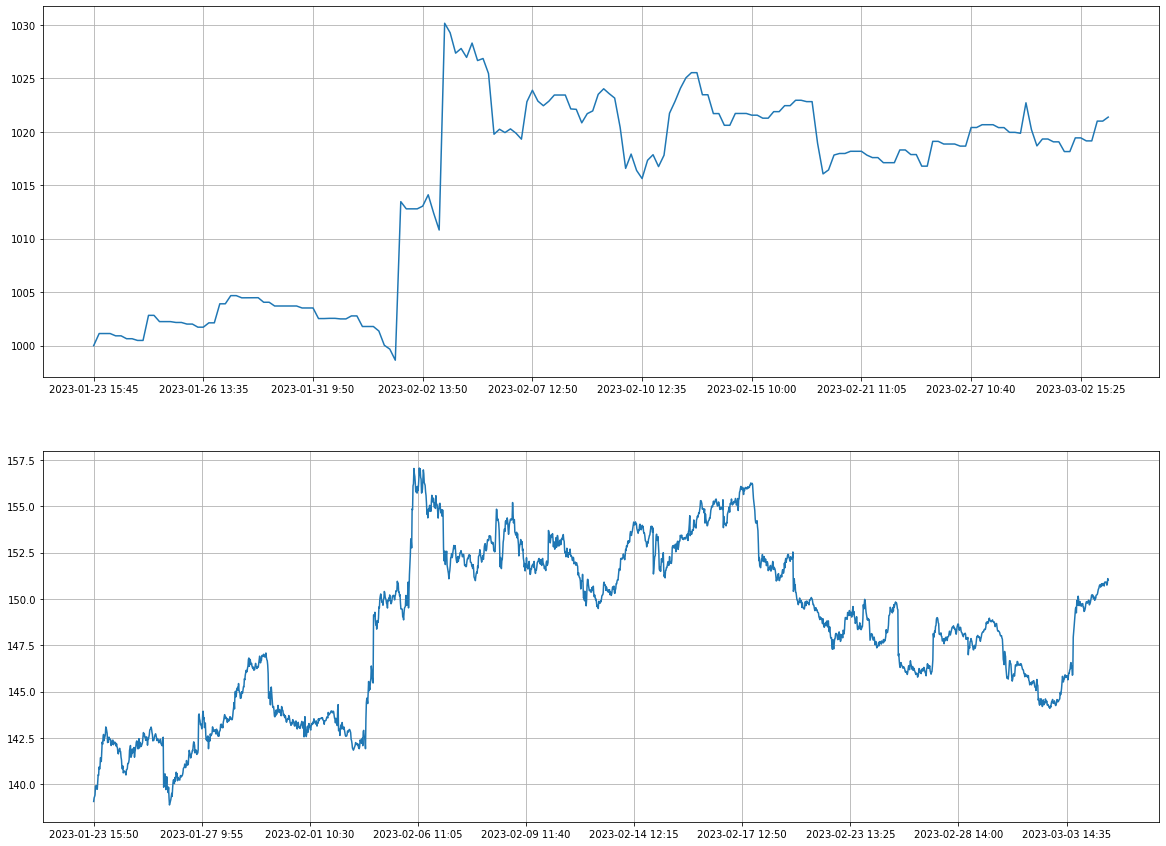

In [5]:
fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios": [1,1]}, figsize=(20,15))

inedxes = np.arange(0,len(strategy.tradetimestamps), len(strategy.tradetimestamps) // 9)
ax[0].plot(bt.portfolio_value)
plt.sca(ax[0])
plt.xticks(inedxes, [str(strategy.tradetimestamps[i].date())+ " "+str(strategy.tradetimestamps[i].hour)+":"+str("%02d" % strategy.tradetimestamps[i].minute) for i in inedxes])
ax[0].grid()

plotdata = data[np.logical_and(data.index < strategy.tradetimestamps[-1], data.index > strategy.tradetimestamps[0])]
inedxes = np.arange(0, len(plotdata), len(plotdata) // 9)
ax[1].plot(data['Close'].values)
plt.sca(ax[1])
plt.xticks(inedxes, [str(plotdata.index[i].date())+ " "+str(plotdata.index[i].hour)+":"+str("%02d" % plotdata.index[i].minute) for i in inedxes])
ax[1].grid()

In [6]:
risk_free_rate = yf.download("^TNX", progress=False)[['Close']].reset_index()
risk_free_rate['daily_risk_free_rate'] = (1 + risk_free_rate['Close']) ** (1/252) - 1
risk_free_rate.set_index("Date", inplace=True)
risk_free_rate

,Close,daily_risk_free_rate
Date,,
1962-01-02,4.060,0.006455
1962-01-03,4.030,0.006431
1962-01-04,3.990,0.006399
1962-01-05,4.020,0.006423
1962-01-08,4.030,0.006431
...,...,...
2023-02-27,3.922,0.006344
2023-02-28,3.916,0.006339
2023-03-01,3.994,0.006402
